# 📊 Prosacco Supply & Demand Analysis Report

## Executive Summary
This notebook integrates **order data**, **initial inventory**, and the **production plan**  
to analyze supply vs. demand for Prosacco SKUs.

### Key Sections
- **Objective**: Define the analysis goals  
- **Data Overview**: Load and inspect datasets (orders, inventory, production plan)  
- **Methodology**: Merge and align supply & demand data  
- **Analysis & Results**: Highlight shortages, delays, and overproduction  
- **Visualizations**: Graphical representation of supply vs. demand  
- **Conclusions & Recommendations**: Business insights for decision-making  

---


## 1. Objective

The goal of this analysis is to evaluate how well Prosacco's production and inventory plan meets customer demand.

## 2. Data Overview

We will use three datasets:
- **Order Report** (`Prosacco-order-report.csv`)
- **Initial Inventory** (`Prosacco-Initial-Inventory.csv`)
- **Production Plan** (provided table, converted to structured format)

In [1]:
import pandas as pd

# Load datasets
orders = pd.read_csv("data/Prosacco-order-report.csv")
inventory = pd.read_csv("data/Prosacco-Initial-Inventory.csv")

# Preview data
orders.head(), inventory.head()

(         Country           City  PO/ORDER#        Categories     SKU  QTY ORD  \
 0  United States  NEW YORK CITY     102981    Fresh Packaged  FP2020       52   
 1  United States  NEW YORK CITY     102980    Organic Beauty  OY2545       52   
 2  United States    Los Angeles     102979    Organic Beauty  OY2545        3   
 3  United States    Los Angeles     102978  Healthy Beverage  HB1016        3   
 4  United States    Los Angeles     102977           Healthy  HT1064       90   
 
   CHANNEL WAREHOUSE Pick-Up / Delivery   Customer  SALES $  EXPECTED  
 0  Retail      Kern           Delivery  Customer1     6500     45236  
 1  Retail      Kern           Delivery  Customer1     6500     45274  
 2  Retail      Kern           Delivery  Customer1      375     45272  
 3  Retail      Kern           Delivery  Customer1      375     45206  
 4  Retail      Kern           Delivery  Customer1    11250     45213  ,
            Category     SKU Warehouse  Available
 0    Fresh Packaged  F

In [2]:
# Summarize orders by SKU using the correct column name
order_summary = orders.groupby('SKU')['QTY ORD'].sum().reset_index()
order_summary.head()

,SKU,QTY ORD
0,FP2020,24379
1,FP3055,12190
2,HB0156,886
3,HB1016,29842
4,HT1045,724


In [3]:
# Summarize initial inventory using the correct column name
inventory_summary = inventory.groupby('SKU')['Available'].sum().reset_index()
inventory_summary.head()

,SKU,Available
0,FP2020,4063
1,FP3055,2032
2,HB0156,148
3,HB1016,4974
4,HT1045,121


## 3. Production Plan Data

Convert the provided production plan table into a structured dataframe.

In [4]:
# Manually create production plan dataframe based on provided table
data = {
    "SKU": ["FP2020","FP3055","HB0156","HB1016","HT1045","HT1064","HT2054","OB1265","OF1060","OF2035","OP8025","OY2545"],
    "Wk39":[0,0,0,0,1000,0,0,0,1000,0,0,0],
    "Wk40":[0,1000,1000,0,0,1000,0,1000,0,0,1000,0],
    "Wk41":[0,0,0,2000,0,0,0,0,0,1000,0,2000],
    "Wk42":[1000,1000,0,1000,0,0,1000,0,0,0,1000,2000],
    "Wk43":[3000,0,0,3000,0,0,0,0,0,0,0,1000],
    "Wk44":[5000,2000,0,1000,0,0,0,0,0,0,2000,2000],
    "Wk45":[2000,1000,0,4000,0,0,0,0,0,0,1000,2000],
    "Wk46":[1000,1000,0,2000,0,0,0,0,0,0,1000,2000],
    "Wk47":[3000,1000,0,2000,0,0,0,0,0,0,2000,2000],
    "Wk48":[1000,0,0,3000,0,0,0,0,0,0,1000,2000],
    "Wk49":[1000,1000,0,3000,0,0,0,0,0,0,0,3000],
    "Wk50":[2000,2000,0,3000,0,0,0,0,0,0,1000,1000],
    "Wk51":[2000,1000,0,1000,0,0,0,0,0,0,1000,3000],
    "Delay":["Delay","","","","","","","","","","",""]
}
production = pd.DataFrame(data)
production

,SKU,Wk39,Wk40,Wk41,Wk42,Wk43,Wk44,Wk45,Wk46,Wk47,Wk48,Wk49,Wk50,Wk51,Delay
0,FP2020,0,0,0,1000,3000,5000,2000,1000,3000,1000,1000,2000,2000,Delay
1,FP3055,0,1000,0,1000,0,2000,1000,1000,1000,0,1000,2000,1000,
2,HB0156,0,1000,0,0,0,0,0,0,0,0,0,0,0,
3,HB1016,0,0,2000,1000,3000,1000,4000,2000,2000,3000,3000,3000,1000,
4,HT1045,1000,0,0,0,0,0,0,0,0,0,0,0,0,
5,HT1064,0,1000,0,0,0,0,0,0,0,0,0,0,0,
6,HT2054,0,0,0,1000,0,0,0,0,0,0,0,0,0,
7,OB1265,0,1000,0,0,0,0,0,0,0,0,0,0,0,
8,OF1060,1000,0,0,0,0,0,0,0,0,0,0,0,0,
9,OF2035,0,0,1000,0,0,0,0,0,0,0,0,0,0,


## 4. Methodology

1. Calculate demand from the order report.
2. Compare against available supply (inventory + cumulative production).
3. Identify shortages, surpluses, and delays.

In [5]:
# Example: Summarize orders by SKU
order_summary = orders.groupby('SKU')['QTY ORD'].sum().reset_index()
order_summary.head()

,SKU,QTY ORD
0,FP2020,24379
1,FP3055,12190
2,HB0156,886
3,HB1016,29842
4,HT1045,724


## 5. Analysis & Results

Here we compare **demand vs. supply**.

In [6]:
# Summarize initial inventory
inventory_summary = inventory.groupby('SKU')['Available'].sum().reset_index()

# Total planned production per SKU (ignoring 'Delay' row)
production_summary = production.drop(columns=['Delay']).set_index('SKU').sum(axis=1).reset_index()
production_summary.columns = ['SKU', 'Planned_Production']

# Merge all
supply_demand = order_summary.merge(inventory_summary, on='SKU', how='left')
supply_demand = supply_demand.merge(production_summary, on='SKU', how='left')
supply_demand['Total_Supply'] = supply_demand['Available'].fillna(0) + supply_demand['Planned_Production'].fillna(0)
supply_demand['Gap'] = supply_demand['Total_Supply'] - supply_demand['QTY ORD']
supply_demand

,SKU,QTY ORD,Available,Planned_Production,Total_Supply,Gap
0,FP2020,24379,4063,21000,25063,684
1,FP3055,12190,2032,11000,13032,842
2,HB0156,886,148,1000,1148,262
3,HB1016,29842,4974,25000,29974,132
4,HT1045,724,121,1000,1121,397
5,HT1064,828,138,1000,1138,310
6,HT2054,1124,187,1000,1187,63
7,OB1265,780,130,1000,1130,350
8,OF1060,193,32,1000,1032,839
9,OF2035,1110,185,1000,1185,75


## 6. Visualizations

We will plot demand vs. supply per SKU.

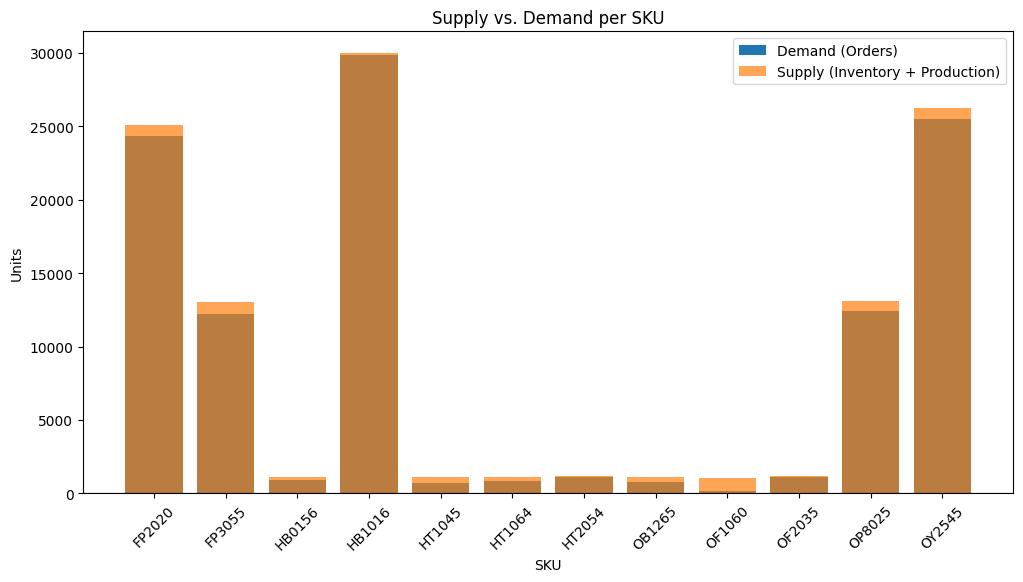

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(supply_demand['SKU'], supply_demand['QTY ORD'], label='Demand (Orders)')
plt.bar(supply_demand['SKU'], supply_demand['Total_Supply'], alpha=0.7, label='Supply (Inventory + Production)')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Supply vs. Demand per SKU')
plt.xlabel('SKU')
plt.ylabel('Units')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## 7. Conclusions & Recommendations

- Identify which SKUs have shortages (Gap < 0).
- Identify which SKUs are overproduced (Gap > 0).
- Recommend adjustments in production planning.

---
**Next Steps:**
- Refine analysis by week (not just totals).
- Incorporate lead times and delays into simulation.
- Provide actionable recommendations to optimize supply coverage.

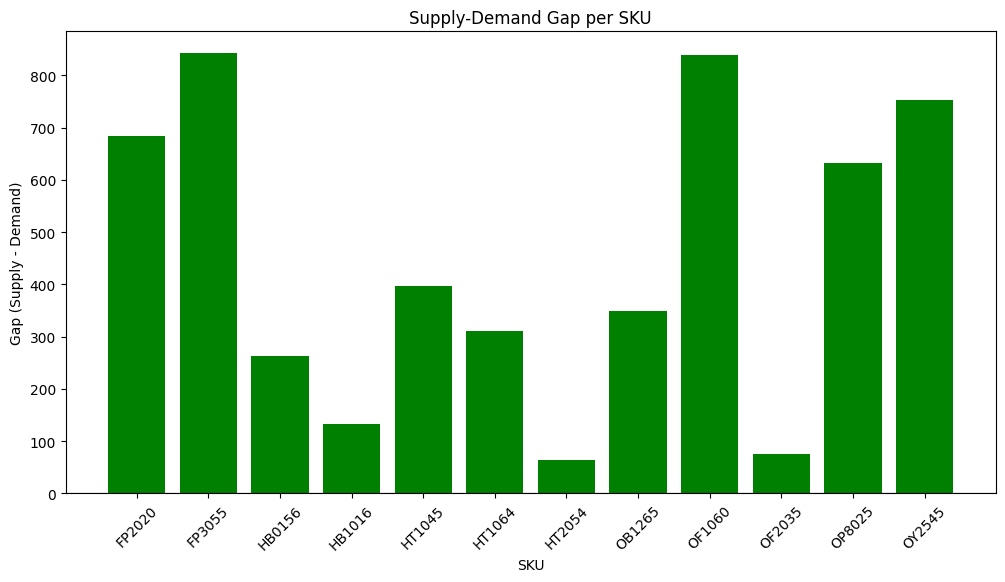

SKUs with shortages (Gap < 0):
Empty DataFrame
Columns: [SKU, Gap]
Index: []

SKUs with overproduction (Gap > 0):
       SKU  Gap
0   FP2020  684
1   FP3055  842
2   HB0156  262
3   HB1016  132
4   HT1045  397
5   HT1064  310
6   HT2054   63
7   OB1265  350
8   OF1060  839
9   OF2035   75
10  OP8025  633
11  OY2545  752


In [8]:
# Visualize SKUs with shortages and overproduction
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))
colors = np.where(supply_demand['Gap'] < 0, 'red', np.where(supply_demand['Gap'] > 0, 'green', 'gray'))
plt.bar(supply_demand['SKU'], supply_demand['Gap'], color=colors)
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Supply-Demand Gap per SKU')
plt.xlabel('SKU')
plt.ylabel('Gap (Supply - Demand)')
plt.xticks(rotation=45)
plt.show()

# Show summary tables for shortages and overproduction
print('SKUs with shortages (Gap < 0):')
print(supply_demand[supply_demand['Gap'] < 0][['SKU', 'Gap']])
print('\nSKUs with overproduction (Gap > 0):')
print(supply_demand[supply_demand['Gap'] > 0][['SKU', 'Gap']])